<img src='https://drive.google.com/uc?id=1nptVTliqyIIOzwF08JXJkWEvlYUC4_g5'  width="1500" height="300">

<div class="markdown-google-sans">
  <h1>Introducción a Lógica Difusa</h1>
</div>

[Fuzzy logic - lógica difusa](https://en.wikipedia.org/wiki/Fuzzy_logic)

![](https://databasecamp.de/wp-content/uploads/Fuzzy-Logic-EN-2-1024x709.png)

![](https://www.mathworks.com/help/fuzzy/fuzzy_tall.png)

![](https://upload.wikimedia.org/wikipedia/commons/2/22/Fuzzy_logic.png)

## Como instalar?

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSk85tgYGyJEW2yaP3RnL0Cp0Jhvt-uK_efOdsH06mU97W-CKKzXQ&s" width="400" height="300" />

### Opción 1

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.4 MB/s eta 0:00:00


### Opción 2

In [2]:
!sudo git clone https://github.com/scikit-fuzzy/scikit-fuzzy.git

Cloning into 'scikit-fuzzy'...
remote: Enumerating objects: 2820, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 2820 (delta 76), reused 64 (delta 61), pack-reused 2699 (from 3)
Receiving objects: 100% (2820/2820), 5.14 MiB | 12.44 MiB/s, done.
Resolving deltas: 100% (1667/1667), done.


<div class="markdown-google-sans">
  <h1>Ejemplo 1: Calidad de comida + servicio = % de Propina</h1>
</div>

<img src="https://cdn.memegenerator.es/imagenes/memes/full/31/29/31290312.jpg" width="400" height="300" />

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [4]:
# Generar variables del universo
# * Calidad y servicio en rangos subjetivos [0, 10]
# * La propina tiene un rango de [0, 25] en unidades de puntos porcentuales
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

In [5]:
x_qual

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
# Generar funciones de membresía difusas
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

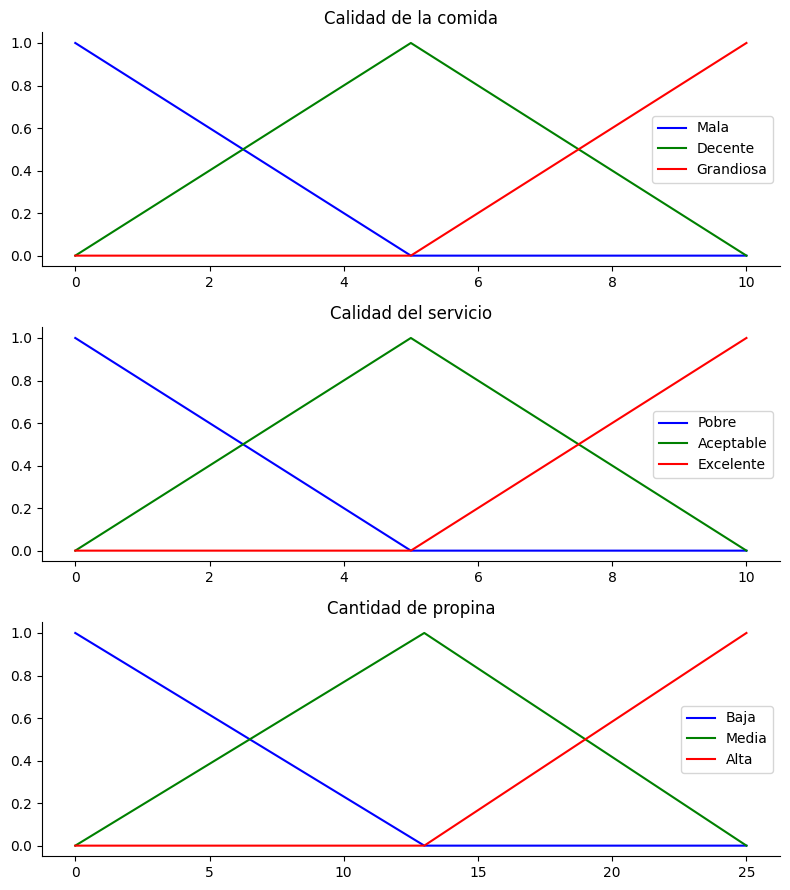

In [7]:
# Visualizando estos universos y funciones de membresía
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))
ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Mala')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decente')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Grandiosa')
ax0.set_title('Calidad de la comida')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Pobre')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Aceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Excelente')
ax1.set_title('Calidad del servicio')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Baja')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Media')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='Alta')
ax2.set_title('Cantidad de propina')
ax2.legend()

# Quitar ejes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [14]:
#@title Number fields
# Ingresando nuestas entradas (10 to 40)
quality_value=6 #@param {type:"number"}
service_value=7 #@param {type:"number"}

In [15]:
print(quality_value)
print(service_value)

6
7


In [16]:
# Necesitamos la activación de nuestras funciones de membresía difusas en estos valores.
# Los valores exactos 6.5 y 9.8 no existen en nuestros universos ...
# ¡Esto es para lo que existe fuzz.interp_membership!

qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, float(quality_value))
qual_level_md = fuzz.interp_membership(x_qual, qual_md, float(quality_value))
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, float(quality_value))

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, float(service_value))
serv_level_md = fuzz.interp_membership(x_serv, serv_md, float(service_value))
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, float(service_value))

In [17]:
# Ahora tomamos nuestras reglas y las aplicamos. La regla 1 se refiere a mala comida o servicio.
# El operador OR significa que tomamos el máximo de estos dos.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

# Ahora aplicamos esto recortando la parte superior de la salida correspondiente
tip_activation_lo = np.fmin(active_rule1, tip_lo)

# Para la regla 2 conectamos un servicio aceptable con propinas medianas
tip_activation_md = np.fmin(serv_level_md, tip_md)

# Para la regla 3, conectamos un servicio excelente O una comida grandiosa con una propina alta
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)

tip0 = np.zeros_like(x_tip)

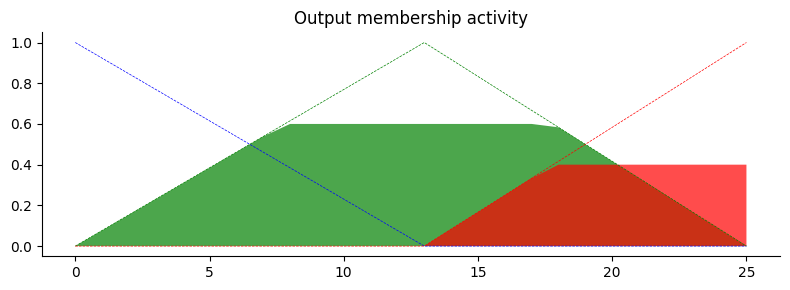

In [18]:
# Visualizando las reglas activadas
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Quitando ejes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [19]:
# Agregue las tres funciones de membresía de salida juntas
aggregated = np.fmax(tip_activation_lo, np.fmax(tip_activation_md, tip_activation_hi))

# Calcular resultado defuzzificado
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # útil para el gráfico final
tip_activation

0.6

In [20]:
#  Presentando el valor de salid 'crisp'
print(tip)

13.535706290575334


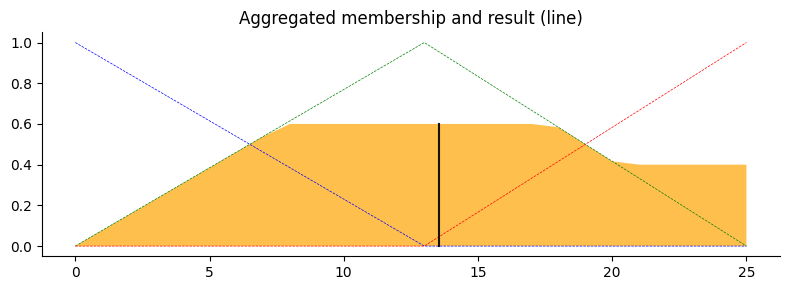

In [21]:
# Visualizando la salida

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Quitando los ejes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

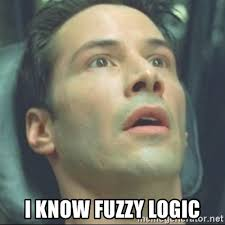

# Ejemplo de propinas de manera más programática

In [39]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definiendo entradas y salida
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

In [40]:
quality.universe, quality.label

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'quality')

In [41]:
# Definiendo las funciones de membresía de forma automática
quality.automf(3)
service.automf(3)

In [42]:
# Personalizando las funciones de membresías
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

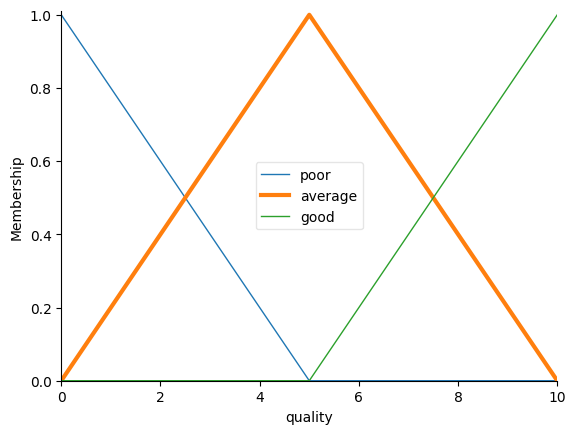

In [50]:
# Graficando el Universo de Calidad de la Comida
quality['average'].view()

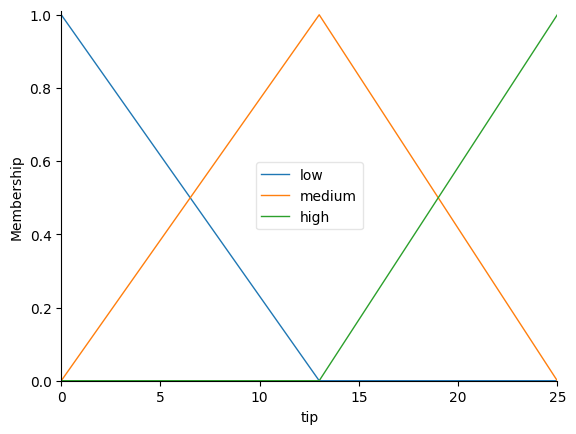

In [51]:
# Graficando el Universo de la salida de Propinas
tip.view()

In [52]:
# Definiedo las reglas que relacionan las entradas y la salida
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(quality['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])
rule4 = ctrl.Rule(service['average'], tip['medium'])

In [53]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

In [54]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [56]:
# Colocando valores de entradas para calcular la salida (% de Propinas)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()

14.79822137450634


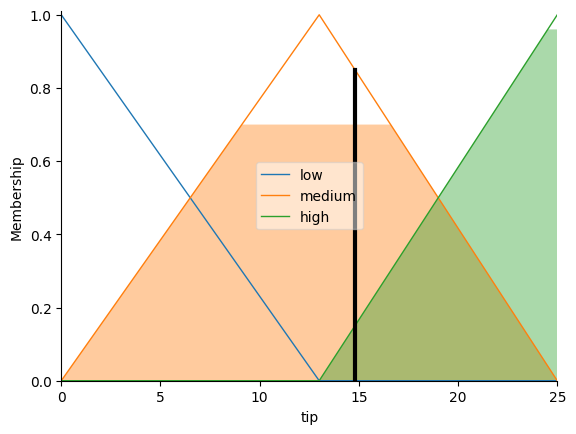

In [57]:
print(tipping.output['tip'])
tip.view(sim=tipping)

<img src='https://drive.google.com/uc?id=1JTvS_vjZTzQfHiMOt9ZbfqmjNN1FvOOm'>